In [241]:
import gym
import numpy as np
import random 
from collections import Counter
from statistics import mean, median
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Flatten  
from keras.models import load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [242]:
UP = 2
DOWN = 5

In [243]:
env = gym.make('Pong-v0')
init_ob = env.reset()

In [244]:
def random_action():
    r = random.randrange(0,2)
    if r == 0:
        return UP
    elif r == 1:
        return DOWN

def tobits(act):
    if act == 2:
        # action was up
        return 1
    elif act == 5:
        # action was down
        return -1
    else:
        # action was noop
        return 0

In [245]:
def initial_population(n_games=100, max_frames=300, score_requirement = -2):
    training_data = []
    scores = []
    accepted_scores = []
    
    for episode in range(n_games):
        score = 0
        game_memory = []
        observation = env.reset()

        for _ in range(max_frames):
            action = random_action()
            game_memory.append([observation, tobits(action)])
            observation, reward, done, info = env.step(action)
            
            score += reward
            
            if done:
                break

        print("=> Episode #",episode+1,"\tScore: ",score)
        
        if score >= score_requirement:
            accepted_scores.append(score)
            
            for data in game_memory:                
                training_data.append([data[0],data[1]])
                
        scores.append(score)
    
    env.close()

    return training_data

In [246]:
Dataset = initial_population()

=> Episode # 1 	Score:  -5.0
=> Episode # 2 	Score:  -3.0
=> Episode # 3 	Score:  -5.0
=> Episode # 4 	Score:  -5.0
=> Episode # 5 	Score:  -4.0
=> Episode # 6 	Score:  -5.0
=> Episode # 7 	Score:  -4.0
=> Episode # 8 	Score:  -3.0
=> Episode # 9 	Score:  -3.0
=> Episode # 10 	Score:  -5.0
=> Episode # 11 	Score:  -5.0
=> Episode # 12 	Score:  -5.0
=> Episode # 13 	Score:  -4.0
=> Episode # 14 	Score:  -5.0
=> Episode # 15 	Score:  -4.0
=> Episode # 16 	Score:  -5.0
=> Episode # 17 	Score:  -5.0
=> Episode # 18 	Score:  -3.0
=> Episode # 19 	Score:  -2.0
=> Episode # 20 	Score:  -4.0
=> Episode # 21 	Score:  -4.0
=> Episode # 22 	Score:  -3.0
=> Episode # 23 	Score:  -5.0
=> Episode # 24 	Score:  -5.0
=> Episode # 25 	Score:  -3.0
=> Episode # 26 	Score:  -3.0
=> Episode # 27 	Score:  -3.0
=> Episode # 28 	Score:  -5.0
=> Episode # 29 	Score:  -4.0
=> Episode # 30 	Score:  -3.0
=> Episode # 31 	Score:  -5.0
=> Episode # 32 	Score:  -5.0
=> Episode # 33 	Score:  -5.0
=> Episode # 34 	Sc

In [247]:
def process_data(data):
    cropped = data[34:-16,:]
    if len(cropped.shape) == 3:
        return np.mean(cropped[::2,::2,:], axis=2)
    elif len(cropped.shape) == 4:
        downsample = np.mean(cropped[:, ::2, ::2], axis=3)
        return downsample.reshape(*downsample.shape, 1)
    else:
        raise ValueError()

In [248]:
X_train = np.array([i[0] for i in Dataset])

f = lambda x:x if x == 1 else 0
y_train = np.array([f(i[1]) for i in Dataset])
y_train = y_train.reshape(y_train.shape[0], 1)

Check if downsampling removes pertinent data:

In [249]:
def show(img):
    if not hasattr(img, 'shape'): 
        raise ValueError
    
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)

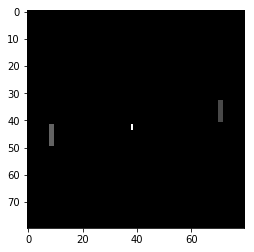

In [250]:
show(process_data(X_train[20]))